In [35]:
#https://github.com/octonion/soccer/tree/master/club/loaders
#https://github.com/rjtavares/football-crunching

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

path = r'C:\Users\Gordon\Desktop\Data\football_data\brazil_octo_data\2006\attacks.csv'
attk_cols = ['game_id', 'year', 'league_key', 'key', 'jersey', 'avg_x', 'avg_y', 'pos_x', 'pos_y',
            'left', 'middle', 'right', 'player_id', 'team_id', 'position', 'cdata', 'heat_map']
attacks = pd.read_csv(path, encoding='iso-8859-1', header = None, names = attk_cols)
attacks.head()

,game_id,year,league_key,key,jersey,avg_x,avg_y,pos_x,pos_y,left,middle,right,player_id,team_id,position,cdata,heat_map
0,193547,2006,futebol+brasileiro,t819,NaN,0,0,0,0,0,0,0,-1,819,NaN,NaN,NaN
1,193547,2006,futebol+brasileiro,t6087,NaN,0,0,0,0,0,0,0,-1,6087,NaN,NaN,NaN
2,193547,2006,futebol+brasileiro,p74995,null,0,0,0,0,0,0,0,74995,6087,M,NaN,NaN
3,193548,2006,futebol+brasileiro,t3445,NaN,0,0,0,0,0,0,0,-1,3445,NaN,NaN,NaN
4,193548,2006,futebol+brasileiro,t6088,NaN,0,0,0,0,0,0,0,-1,6088,NaN,NaN,NaN


In [44]:
print(len(attacks))
print(attacks.isnull().sum())

9035
game_id          0
year             0
league_key       0
key              0
jersey        1174
avg_x            0
avg_y            0
pos_x            0
pos_y            0
left             0
middle           0
right            0
player_id        0
team_id          0
position      1174
cdata         9035
heat_map      9035
dtype: int64


cdata and heat_map are completely empty. Positional data basically meaningless.

In [50]:
print(attacks.avg_x.value_counts())
print(attacks.avg_y.value_counts())
print(attacks.pos_x.value_counts())
print(attacks.pos_y.value_counts())

0    9035
Name: avg_x, dtype: int64
0    9035
Name: avg_y, dtype: int64
0    9035
Name: pos_x, dtype: int64
0    9035
Name: pos_y, dtype: int64


In [37]:
path2 = r'~\Desktop\Data\football_data\brazil_octo_data\2006\gamecast.csv'
gamecast_cols = ['game_id', 'year', 'league_key', 'home_id', 'home_color', 'home_name', 
                 'away_id', 'away_color', 'away_name']
game_cast = pd.read_csv(path2, encoding='iso-8859-1', header = None, names = gamecast_cols)
game_cast.head()

,game_id,year,league_key,home_id,home_color,home_name,away_id,away_color,away_name
0,193547,2006,futebol+brasileiro,819,C8142F,Flamengo,6087,000099,Nova IguaÃ§u
1,193548,2006,futebol+brasileiro,3445,C8142F,Fluminense FC,6088,000099,Portuguesa (Ca)
2,193550,2006,futebol+brasileiro,6087,C8142F,Nova IguaÃ§u,3445,000099,Fluminense FC
3,193551,2006,futebol+brasileiro,4801,C8142F,Cabofriense,819,000099,Flamengo
4,193552,2006,futebol+brasileiro,4800,C8142F,Americano,3445,000099,Fluminense FC


In [57]:
len(game_cast)

587

In [38]:
path3 = r'~\Desktop\Data\football_data\brazil_octo_data\2006\parts.csv'
parts_cols = ['game_id', 'year', 'league_key', 'shot_id', 'part_id', 'player_id', 
                 'jersey', 'start_x', 'start_y', 'end_x', 'end_y', 'end_z', 'player', 'result', 'result_text']
parts = pd.read_csv(path3, encoding='iso-8859-1', header = None, names = parts_cols)
parts.head()

,game_id,year,league_key,shot_id,part_id,player_id,jersey,start_x,start_y,end_x,end_y,end_z,player,result,result_text
0,193547,2006,futebol+brasileiro,5541697,0,74995,NaN,0.0,1.0,NaN,NaN,NaN,Deni,<b>Deni</b><br>Goal,Goal
1,193548,2006,futebol+brasileiro,5541706,0,74954,NaN,1.0,0.0,NaN,NaN,NaN,Evando,<b>Evando</b><br>Goal,Goal
2,193548,2006,futebol+brasileiro,5541707,0,74930,NaN,1.0,0.0,NaN,NaN,NaN,Gabriel Santos,<b>Gabriel Santos</b><br>Goal,Goal
3,193548,2006,futebol+brasileiro,5541708,0,74953,NaN,1.0,0.0,NaN,NaN,NaN,Adriano Magr&#227;o,<b>Adriano Magr&#227;o</b><br>Goal,Goal
4,193548,2006,futebol+brasileiro,5904016,0,75696,NaN,0.0,1.0,NaN,NaN,NaN,Biulla,<b>Biulla</b><br>Goal,Goal


In [56]:
print(len(parts))
print(parts.isnull().sum())

2854
game_id           0
year              0
league_key        0
shot_id           0
part_id           0
player_id         0
jersey         1661
start_x           0
start_y           0
end_x          2854
end_y          2854
end_z          2854
player           27
result            0
result_text       0
dtype: int64


End x,y,z all empty. parts.csv basically the same as shots.csv.

In [39]:
path4 = r'~\Desktop\Data\football_data\brazil_octo_data\2006\shots.csv'
shots_cols = ['game_id', 'year', 'league_key', 'shot_id', 'clock', 'added_time', 
                 'period', 'start_x', 'start_y', 'team_id', 'goal', 'own_goal', 'shootout', 'video_id', 'player',
             'result', 'top_score_text', 'shot_by_text', 'parts']
shots = pd.read_csv(path4, encoding='iso-8859-1', header = None, names = shots_cols)
shots.head()

,game_id,year,league_key,shot_id,clock,added_time,period,start_x,start_y,team_id,goal,own_goal,shootout,video_id,player,result,top_score_text,shot_by_text,parts
0,193547,2006,futebol+brasileiro,5541697,58,NaN,2,0.0,1.0,6087,t,f,f,NaN,Deni,<b>Deni</b> - 58' <br>Goal,(58'),Shot by Deni,1
1,193548,2006,futebol+brasileiro,5541706,7,NaN,1,1.0,0.0,3445,t,f,f,NaN,Evando,<b>Evando</b> - 7' <br>Goal,(7'),Shot by Evando,1
2,193548,2006,futebol+brasileiro,5541707,18,NaN,1,1.0,0.0,3445,t,f,f,NaN,Gabriel Santos,<b>Gabriel Santos</b> - 18' <br>Goal,(18'),Shot by Gabriel Santos,1
3,193548,2006,futebol+brasileiro,5541708,32,NaN,1,1.0,0.0,3445,t,f,f,NaN,Adriano Magr&#227;o,<b>Adriano Magr&#227;o</b> - 32' <br>Goal,(32'),Shot by Adriano MagrÃ£o,1
4,193548,2006,futebol+brasileiro,5904016,63,NaN,2,0.0,1.0,6088,t,f,f,NaN,Biulla,<b>Biulla</b> - 63' <br>Goal,(63'),Shot by Biulla,1


In [63]:
print(len(shots))
print(shots.isnull().sum())

2854
game_id              0
year                 0
league_key           0
shot_id              0
clock                0
added_time        2745
period               0
start_x              0
start_y              0
team_id              0
goal                 0
own_goal             0
shootout             0
video_id          2854
player              27
result               0
top_score_text    1150
shot_by_text        27
parts                0
dtype: int64


shot.parts is useless

In [99]:
# %load C:\Users\Gordon\Desktop\Soccer_Analytics\code\football_pitch.py
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

x_size = 105.0
y_size = 68.0

def draw_pitch():
    #set up field    
    fig = plt.figure(figsize=(x_size/10, y_size/10))
    fig.patch.set_facecolor('#78AB46')

    axes = fig.add_subplot(1, 1, 1, axisbg='#78AB46')
    axes.xaxis.set_visible(False)
    axes.yaxis.set_visible(False)

    plt.xlim([-5,x_size+5])
    plt.ylim([-5,y_size+5])

    box_height = ((16.5*2 + 7.32)/y_size)/1.15
    box_width = (16.5/x_size)/1.15

    team_colors = {'H': 'red',
                   'A': 'white'}    

    r1 = plt.Rectangle((0.04338, 0.0641), (0.95652-0.04338), (0.9359-0.0641),
                       edgecolor="white", facecolor="none", alpha=1, transform=axes.transAxes) #pitch

    r2 = plt.Line2D([0.5, 0.5], [0.9359, 0.0641],
                    c='w', transform=axes.transAxes) #half-way line

    r3 = plt.Rectangle((0.04338, (1-box_height)/2), box_width, box_height,
                       ec='w', fc='none', transform=axes.transAxes) #penalty area

    r4 = plt.Rectangle((0.95652-box_width, (1-box_height)/2), box_width, box_height,
                       ec='w', fc='none', transform=axes.transAxes) #penalty area

    r5 = Ellipse((0.5, 0.5), 9.15*2/x_size, 9.15*2/y_size,
                                    ec='w', fc='none', transform=axes.transAxes) #middle circle

    fig.lines.extend([r1, r2, r3, r4, r5])
    
    return fig, axes

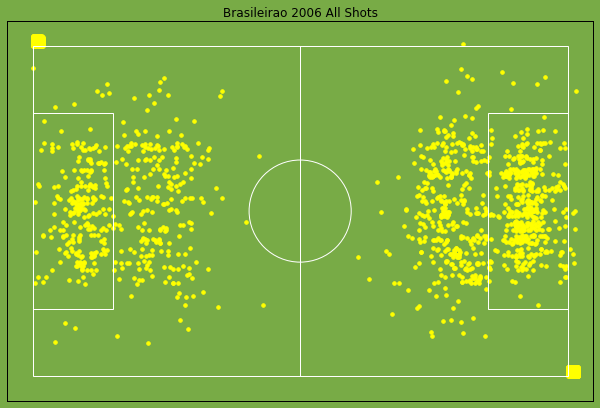

In [131]:
draw_pitch() #105 by 68
plt.scatter(shots.start_x.values*105+np.random.rand(len(shots))*2, 
            shots.start_y.values*68+np.random.rand(len(shots))*2, 
            marker='.', 
            color='yellow', 
            s = 50)

plt.title('Brasileirao 2006 All Shots');

In [134]:
path5 = r'~\Desktop\Data\football_data\brazil_octo_data\2015\shots.csv'
shots_2016 = pd.read_csv(path5, encoding='iso-8859-1', header = None, names = shots_cols)
shots_2016.head()

,game_id,year,league_key,shot_id,clock,added_time,period,start_x,start_y,team_id,goal,own_goal,shootout,video_id,player,result,top_score_text,shot_by_text,parts
0,409482,2015,futebol+brasileiro,22302798,67,NaN,2,0.0,1.0,3445,t,f,f,NaN,Jean,<b>Jean</b> - 67' <br>Goal,(67'),Shot by Jean,1
1,409482,2015,futebol+brasileiro,22303003,76,NaN,2,1.0,0.0,4786,t,f,f,NaN,Rodrigo,<b>Rodrigo</b> - 76' <br>Goal,(76'),Shot by Rodrigo,1
2,409482,2015,futebol+brasileiro,22303707,90,NaN,2,0.0,1.0,4786,t,t,f,NaN,Mois&#233;s,<b>Mois&#233;s</b> - 90' <br>Own Goal,(90' OG),Shot by MoisÃ©s,1
3,409486,2015,futebol+brasileiro,22302538,54,NaN,2,1.0,0.0,3454,t,f,f,NaN,Jhon Cley,<b>Jhon Cley</b> - 54' <br>Goal,(54'),Shot by Jhon Cley,1
4,409486,2015,futebol+brasileiro,22302651,58,NaN,2,1.0,0.0,3454,t,f,f,NaN,Luan,<b>Luan</b> - 58' <br>Goal,(58'),Shot by Luan,1


In [154]:
o_pastor_shots = shots_2016.loc[shots_2016.player=='Ricardo Oliveira',:]
o_pastor_shots['new_start_x'] = o_pastor_shots.start_x.map(lambda x: x*105 if x*105 > 105/2.0 else 105-x*105)

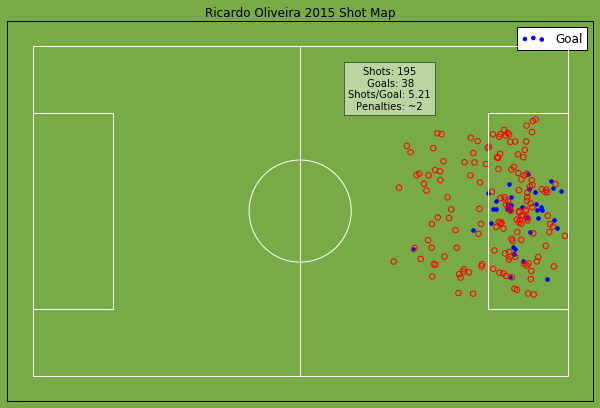

In [187]:
draw_pitch()
plt.scatter(o_pastor_shots.loc[o_pastor_shots.goal=='t',:].new_start_x.values+np.random.rand(len(o_pastor_shots.loc[o_pastor_shots.goal=='t',:]))*1.5, 
            o_pastor_shots.loc[o_pastor_shots.goal=='t',:].start_y.values*68+np.random.rand(len(o_pastor_shots.loc[o_pastor_shots.goal=='t',:]))*1.5, 
            marker='.', 
            color='blue', 
            s = 50)
plt.scatter(o_pastor_shots.loc[o_pastor_shots.goal=='f',:].new_start_x.values+np.random.rand(len(o_pastor_shots.loc[o_pastor_shots.goal=='f',:]))*1.5, 
            o_pastor_shots.loc[o_pastor_shots.goal=='f',:].start_y.values*68+np.random.rand(len(o_pastor_shots.loc[o_pastor_shots.goal=='f',:]))*1.5, 
            marker='o', 
            facecolors='none', 
            edgecolors='r',
            s = 30)
plt.title('Ricardo Oliveira 2015 Shot Map')
plt.text(x_size/1.5, 
         55, 
         "Shots: 195\n Goals: 38\nShots/Goal: 5.21\nPenalties: ~2", 
         color='black', 
         bbox=dict(facecolor='white', alpha=0.5), 
         horizontalalignment='center')
plt.legend({'Goal': 'Goal'});

In [201]:
def shot_data(path_template, years):
    shot_cols = ['game_id', 'year', 'league_key', 'shot_id', 
                 'clock', 'added_time', 'period', 'start_x', 
                 'start_y', 'team_id', 'goal', 'own_goal', 
                 'shootout', 'video_id', 'player', 'result', 
                 'top_score_text', 'shot_by_text', 'parts']
    data = [pd.read_csv(path_template+yr+'/shots.csv', encoding='iso-8859-1', header = None, names = shots_cols)
            for yr in years]
    return pd.concat(data, axis = 0)  

gen_path = '~/Desktop/Data/football_data/brazil_octo_data/'
years = [str(num) for num in range(2006, 2016)]
shots_data = shot_data(gen_path, years)
shots_data.head()

,game_id,year,league_key,shot_id,clock,added_time,period,start_x,start_y,team_id,goal,own_goal,shootout,video_id,player,result,top_score_text,shot_by_text,parts
0,193547,2006,futebol+brasileiro,5541697,58,NaN,2,0.0,1.0,6087,t,f,f,NaN,Deni,<b>Deni</b> - 58' <br>Goal,(58'),Shot by Deni,1
1,193548,2006,futebol+brasileiro,5541706,7,NaN,1,1.0,0.0,3445,t,f,f,NaN,Evando,<b>Evando</b> - 7' <br>Goal,(7'),Shot by Evando,1
2,193548,2006,futebol+brasileiro,5541707,18,NaN,1,1.0,0.0,3445,t,f,f,NaN,Gabriel Santos,<b>Gabriel Santos</b> - 18' <br>Goal,(18'),Shot by Gabriel Santos,1
3,193548,2006,futebol+brasileiro,5541708,32,NaN,1,1.0,0.0,3445,t,f,f,NaN,Adriano Magr&#227;o,<b>Adriano Magr&#227;o</b> - 32' <br>Goal,(32'),Shot by Adriano MagrÃ£o,1
4,193548,2006,futebol+brasileiro,5904016,63,NaN,2,0.0,1.0,6088,t,f,f,NaN,Biulla,<b>Biulla</b> - 63' <br>Goal,(63'),Shot by Biulla,1


In [203]:
shots_data.year.value_counts()

2013    13500
2015    13440
2014    12968
2012    12671
2011    12473
2010     7286
2006     2854
2009     2808
2007     2502
2008     2415
Name: year, dtype: int64

In [204]:
neymar_shots = shots_data.loc[shots_data.player=='Neymar',:]
neymar_shots['new_start_x'] = neymar_shots.start_x.map(lambda x: x*105 if x*105 > 105/2.0 else 105-x*105)

In [214]:
neymar_shots.year.value_counts()

2011    128
2012    107
2010     97
2013     85
2009     13
Name: year, dtype: int64

'2009'

C:\Users\Gordon\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


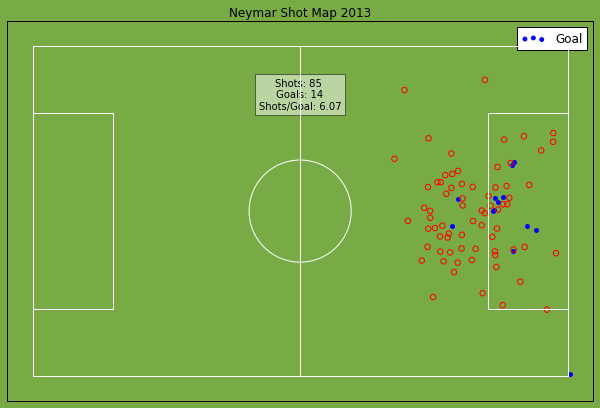

In [252]:
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

@interact(year=('2009', '2010'))
def f(year):
    return year

def player_shot_plot(shot_data, player, year = 2009):

    draw_pitch()
    player_shots = shots_data.loc[(shots_data.player==player) & (shots_data.year==year),:]
    player_shots['new_start_x'] = player_shots.start_x.map(lambda x: x*105 if x*105 > 105/2.0 else 105-x*105)
    goals = player_shots.loc[player_shots.goal=='t',:]
    no_goals = player_shots.loc[player_shots.goal=='f',:]
    plt.scatter(goals.new_start_x.values+np.random.rand(len(goals))*1.5, 
            goals.start_y.values*68+np.random.rand(len(goals))*1.5, 
            marker='.', 
            color='blue', 
            s = 60)
    plt.scatter(no_goals.loc[no_goals.goal=='f',:].new_start_x.values+np.random.rand(len(no_goals))*1.5, 
            no_goals.loc[no_goals.goal=='f',:].start_y.values*68+np.random.rand(len(no_goals))*1.5, 
            marker='o', 
            facecolors='none', 
            edgecolors='r',
            s = 30)
    plt.title('{} Shot Map {}'.format(player, year))
    plt.text(x_size/2, 
         55, 
         "Shots: {0:.0f} \n Goals: {1:.0f} \nShots/Goal: {2:.2f}".format(len(player_shots), len(goals), len(player_shots)/len(goals)), 
         color='black', 
         bbox=dict(facecolor='white', alpha=0.5), 
         horizontalalignment='center')
    plt.legend({'Goal': 'Goal'});
    return None 

player_shot_plot(shots_data, 'Neymar', year = 2013)